# Part One

In [1]:
def getPuzzleInput():
	with open("Day 9.txt") as file:
		return file.read()

def getArea(point1, point2):
	return (abs(point1[0] - point2[0]) + 1) * (abs(point1[1] - point2[1]) + 1)
	

In [51]:
points = [(int(x.split(",")[0]), int(x.split(",")[1])) for x in getPuzzleInput().split("\n")]
pointsCombinations = []

for i in range(len(points)):
	point1 = points[i]
	for j in range(len(points)):
		if i == j:
			continue
		point2 = points[j]
		pointsCombinations.append((point1, point2, getArea(point1, point2)))
pointsCombinations.sort(key=lambda x: x[2], reverse=True)

print(pointsCombinations[0][2])

4767418746


4767418746

In [3]:
# one liner for fun
print(max([getArea(tuple(map(int, points[i].split(","))), tuple(map(int, points[j].split(",")))) for i in range(len(getPuzzleInput().split('\n'))) for j in range(len(getPuzzleInput().split('\n'))) if i != j]))

4767418746


# Part Two

In [52]:
import numpy as np

points = [(int(x.split(",")[0]), int(x.split(",")[1])) for x in getPuzzleInput().split("\n")]

# maxRow = max([line[0] for line in points])
# maxCol = max([line[1] for line in points])

# grid = np.full((maxRow+2, maxCol+2), ".")

# for line in points:
# 	grid[line[0]][line[1]] = "#"

# print(grid)

def printGrid(grid):
	# counterclockwise and flipped along the horizontal axis
	# printingGrid = np.flipud(np.rot90(grid))
	printingGrid = grid
	for row in range(len(printingGrid)):
		for col in range(len(printingGrid[row])):
			print(printingGrid[row][col], end=" ")
		print()

# printGrid(grid)

def createBorders(points):
	outerBorderPoints = []
	corners = []
	for i in range(len(points)): # so it wraps
		x1, y1 = list(points[i%len(points)])
		x2, y2 = list(points[(i+1)%len(points)])

		# going up
		if x1 < x2:
			outerBorderPoints.extend([(x,y) for x in range(x1-1, x2+2) for y in range(y1-1, y2)])
			corners.append((x1-2, y1-1))
		
		# going right
		elif y1 < y2:
			outerBorderPoints.extend([(x,y) for x in range(x1+1, x2+2) for y in range(y1-1, y2+2)])
			corners.append((x1+1, y1-1))

		# going down
		elif x1 > x2:
			outerBorderPoints.extend([(x,y) for x in range(x2-1, x1+2) for y in range(y1+1, y2+2)])
			corners.append((x1+1, y1+1))

		# going left
		elif y1 > y2:
			outerBorderPoints.extend([(x,y) for x in range(x1-1, x2) for y in range(y2-1, y1+2)])
			corners.append((x1-1, y1+1))
	
	return outerBorderPoints, corners

outerBorderPoints, corners = createBorders(points)

In [46]:
def dedupe(arr: list[tuple]) -> list:
	newArr = []
	for a in arr:
		if a not in newArr:
			newArr.append(a)
	return newArr

In [ ]:
import matplotlib.path as mpath

corners.append(corners[0]) # to complete the path for mpath to use

# create a path between the corners
outerPath = mpath.Path(corners)

largestArea = 0
pc1 = pc2 = 0

# print(len(pointsCombinations))

# Go through all of the possible combinations of points around the shape
for i in range(len(pointsCombinations)):
	# print("hi")
	pc1, pc2 = pointsCombinations[i][0:2]
	
	# Create a path from the rectangles opposite points
	rectPoints = [pc1, (pc1[0], pc2[1]), pc2, (pc2[0], pc1[1]), pc1]
	rectPath = mpath.Path(rectPoints)

	# If the path of the rectangle is completely contained within the path the corners make
	if outerPath.contains_path(rectPath):
		# since the list of point combinations is sorted by greatest area, 
		# once we find the largest one that fits we can return
		print(pc1, pc2)
		print(getArea(pc1, pc2))
		break
	# break

		# # And it's area is the largest we've seen
		# if (a := getArea(pc1, pc2)) > largestArea:
		# 	# Ladies and gentlemen, we got 'em.
		# 	largestArea = a


0.00011837505735456944
(15726, 84108) (84839, 17042)
4635268638


(15726, 84108) (84839, 17042)
[15726, 84839] [84108, 17042]


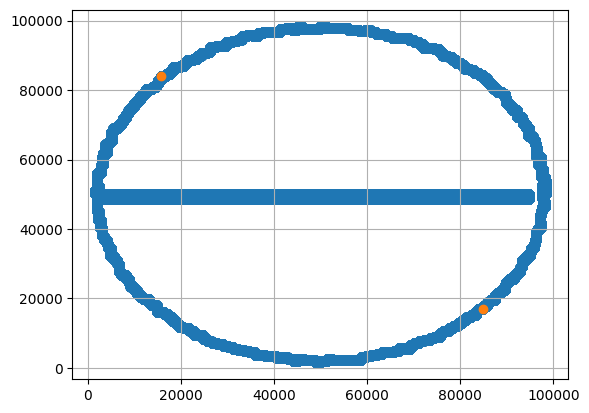

In [57]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath

# print(pc1, pc2)
# plt.xlim(0, 15)
# plt.ylim(-2, 10)
plt.grid(True)
xData = [x[0] for x in outerBorderPoints]
yData = [x[1] for x in outerBorderPoints]
plt.scatter(xData, yData)

# ix = [x[0] for x in points]
# iy = [x[1] for x in points]
# plt.scatter(ix, iy)

print(pc1,pc2)
pcx = [pc1[0], pc2[0]]
pcy = [pc1[1], pc2[1]]
print(pcx, pcy)
plt.scatter(pcx, pcy)


# path = mpath.Path(corners)
outerPath = mpath.Path(corners)
innerPath = mpath.Path(points)

pointsContained = outerPath.contains_path(innerPath)
# print("contained?", pointsContained)

# pc1, pc2 = pointsCombinations[0][0:2]
# # print(pc1, pc2)

# rectPoints = [pc1, (pc1[0], pc2[1]), pc2, (pc2[0], pc1[1]), pc1]
# # print(rectPoints)
# rectPath = mpath.Path(rectPoints)
# pointsContained = outerPath.contains_path(rectPath)
# # print("contained 2?", pointsContained)

# r1 = list(range(pc2[0], pc1[0]+1))
# r2 = list(range(pc1[1], pc2[1]+1))
# print(r1, r2)

# x, y = np.meshgrid(r1, r2)
# # print(x,y)
# rect = np.vstack((x.flatten(), y.flatten())).T
# # print("rect points:", rect)

# contained = outerPath.contains_points(rect)
# # print("contained:", contained)

# contained2dMask = contained.reshape(len(r1), len(r2))

# col = np.where(contained, 'g', 'r')
# print(col)

# xData = rect[:, 0]
# yData = rect[:, 1]

# plt.figure(figsize=(5,5))
# plt.xlim(0, 14)
# plt.ylim(0, 14)
# plt.grid(True)
# plt.scatter(xData, yData, c=col, marker=".", linewidths=2)
# plt.show()

# # xData = [x[0] for x in points]
# # yData = [x[1] for x in points]
# xData = [x[0] for x in corners]
# yData = [x[1] for x in corners]

# plt.figure(figsize=(5,5))
# plt.xlim(0, 14)
# plt.ylim(0, 14)
# plt.grid(True)
# plt.scatter(xData, yData, marker=".", linewidths=2)
# plt.show()

too high:
 - 4635268638

True


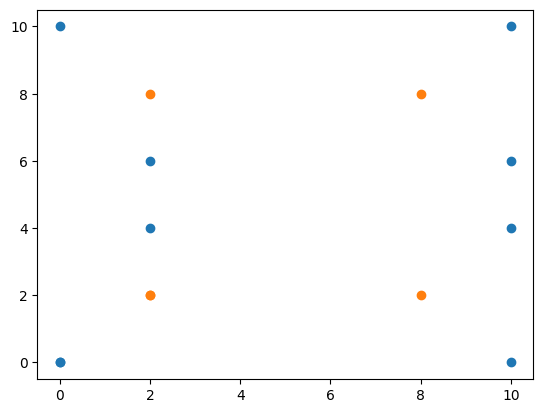

In [62]:
path1 = [
	[0, 0], 
	[0, 10], 
	[10, 10],
	[10, 6],
	[2, 6],
	[2, 4],
	[10, 4],
	[10, 0],
	[0, 0]
]
m1 = mpath.Path(path1)

path2 = [
	[2, 2],
	[8, 2],
	[8, 8],
	[2, 8],
	[2, 2]
]
m2 = mpath.Path(path2)

print(m1.contains_path(m2, transform=None))

plt.scatter(
	[x[0] for x in path1],
	[x[1] for x in path1]
)
plt.scatter(
	[x[0] for x in path2],
	[x[1] for x in path2]
)